In [1]:
# 导入 opencv-python
import cv2

# 导入可视化工具包 matplotlib，并让绘制的图像嵌入在 notebook 中
import matplotlib.pyplot as plt
%matplotlib inline

# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()
    
# 定义可视化图像函数，输入图像 array，可视化图像
def show_img_from_array(img):
    '''输入 array，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
import os
# 根据本文件的位置重定位项目路径
os.chdir(r'/home/featurize/work/mmocr')

load checkpoint from local path: demo/det/latest.pth


/home/featurize/work/mmocr/mmocr/apis/inference.py:50: UserWarning: Class names are not saved in the checkpoint's meta data, use COCO classes by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '
/home/featurize/work/.local/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


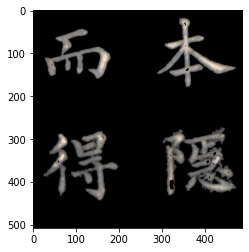

In [5]:
from mmocr.utils.ocr import MMOCR

# 导入模型到内存
ocr = MMOCR(det='MaskRCNN_IC15', recog=None, det_config='configs/textdet/maskrcnn/mask_rcnn_r50_fpn_160e_icdar2015-test.py',
           det_ckpt='demo/det/latest.pth')

# 推理
results = ocr.readtext('../../data/imgs/test/a109.jpg', output='demo/out/det_out.jpg', export='demo/', merge=False)
# 展示结果
show_img_from_path('demo/out/det_out.jpg')